## Hello EDA

In [2]:
import os
import pandas as pd

In [3]:
data_dir = os.path.abspath('../data')
filelist = os.listdir(data_dir)
filelist

['Answers.csv', 'Tags.csv', 'Questions.csv']

In [15]:
csv_encoding = 'ISO-8859-1'
answers_df = pd.read_csv(f"{data_dir}/{filelist[0]}", encoding=csv_encoding)
answers_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [5]:
def display_answers_by_QID (dataframe, Parent_ID: int)->tuple:
    """displays (index, answer) for a given question parent ID on the dataframe
       generated on Answers.csv data"""
    answer = dataframe.query(f'ParentId == {Parent_ID}')
    for item in answer['Body'].items():
        print(item)

def extract_answers_by_QID (dataframe, Parent_ID: int)->tuple:
    """Returns a list of tuples (original index, answer) for a given question parent ID on the dataframe
       generated on Answers.csv data"""
    answer_paragraphs = []
    answer = dataframe.query(f'ParentId == {Parent_ID}')
    for i, item in answer['Body'].items():
        answer_paragraphs.append((i, item))
    return answer_paragraphs



display_answers_by_QID(answers_df, 90)
answers_90 = extract_answers_by_QID(answers_df, 90)

type(answers_90)

(0, '<p><a href="http://svnbook.red-bean.com/">Version Control with Subversion</a></p>\r\n\r\n<p>A very good resource for source control in general. Not really TortoiseSVN specific, though.</p>')
(10748, '<p>You can also try <em><a href="http://www.codeproject.com/KB/work/XTortoiseSVN.aspx" rel="nofollow">Version Control for the Standalone Programmer - Part 1</a></em> or perhaps <em><a href="http://www.kenegozi.com/Blog/2007/07/30/merging-with-tortoisesvn.aspx" rel="nofollow">Merging with TortoiseSVN</a></em>.</p>\n')
(85572, '<p>My easy click-by-click instructions (<strong>specific to TortoiseSVN</strong>) are in Stack&nbsp;Overflow question <em><a href="http://stackoverflow.com/questions/1461922">What is the simplest way to do branching and merging using TortoiseSVN?</a></em>.</p>\n')


list

In [6]:
type(answers_df.CreationDate[0]) #Date is not encoded as datetime

str

Data has answers from 2016 as latest

In [7]:
answers_df.tail() #As answers are by default organized by date, oldest first, I'm looking at dataframe tail to see the most recent answers

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...
2014515,40143389,4464432.0,2016-10-19T23:58:58Z,40142910,0,<p>Try add <code>retrun false</code> in the <c...


In [8]:
display_answers_by_QID(answers_df, 40141860)

(2014513, '<p>I came up with a very dirty workaround. Before bootstraping the module I add the provider directly to the annotations of the class using the Reflect API:</p>\n\n<pre><code>import "reflect-metadata";\nimport { MySecondRootModule } from "MySecondRootModule";\nimport { ServiceTwo } from "ServiceTwo";\n\nexport class MySecondRootApplication\n{\n    constructor()\n    {\n        let serviceTwo = new ServiceTwo(42);\n        let annotations: Array&lt;any&gt; = (Reflect as any).getMetadata("annotations", MySecondRootModule);      \n\n        if (annotations[0].providers != undefined)\n        {\n            annotations[0].providers.push({ provide: ServiceTwo, useValue: serviceTwo });\n        }\n        else\n        {\n            annotations[0].providers = [{ provide: ServiceTwo, useValue: serviceTwo }];\n        }\n\n        (Reflect as any).defineMetadata("annotations", annotations, type);\n\n        // Perform what ever else needs to be done\n\n        platformBrowserDynami

Seems that more recent questions on StackOverflow allow HMTL 

```html
<code></code>
```

When did code snippet appear on StackOverflow ?

I will try to code so I can know when code snippet first appears

In [9]:
import re

match_html = '<code>'

answers_40142910 = extract_answers_by_QID(answers_df, 40141860)

def is_string_in_answer_corpus(search_string:str, answers:tuple)-> bool:
    """takes in a string to look for in an answer corpus tuple and returns a bool"""
    for _, answer in enumerate(answers):
        matches =[]
        matches.append(re.search(search_string, answer[1]))
        if len(matches) > 0:
            return True
        else:
            return False

is_string_in_answer_corpus(match_html, answers_40142910)


True

In [10]:
answers_df['Years'] = answers_df.CreationDate.str[:4]

all_years = answers_df['Years'].unique()


years_with_code_snippet =[]

for year in all_years:
    selected_year_df = answers_df.query(f"Years == '{year}'")
    matches =[]

    for _, item  in selected_year_df['Body'].items():
        matches.append(re.search(match_html, item))

    if len(matches) > 0:
        years_with_code_snippet.append(year)


years_with_code_snippet
         


['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [11]:
df_2008 = answers_df.query(f"Years == '2008'")

matches_2008 = []

for i, item in df_2008['Body'].items():
    matches_2008.append((i ,re.search(match_html, item)))

matches_2008

[(0, None),
 (1, <re.Match object; span=(167, 173), match='<code>'>),
 (2, <re.Match object; span=(367, 373), match='<code>'>),
 (3, None),
 (4, None),
 (5, None),
 (6, None),
 (7, None),
 (8, None),
 (9, None),
 (10, None),
 (11, None),
 (12, None),
 (13, None),
 (14, None),
 (15, None),
 (16, <re.Match object; span=(1230, 1236), match='<code>'>),
 (17, None),
 (18, None),
 (19, <re.Match object; span=(656, 662), match='<code>'>),
 (20, None),
 (21, None),
 (22, <re.Match object; span=(82, 88), match='<code>'>),
 (23, <re.Match object; span=(151, 157), match='<code>'>),
 (24, <re.Match object; span=(187, 193), match='<code>'>),
 (25, <re.Match object; span=(425, 431), match='<code>'>),
 (26, <re.Match object; span=(215, 221), match='<code>'>),
 (27, None),
 (28, <re.Match object; span=(174, 180), match='<code>'>),
 (29, None),
 (30, None),
 (31, <re.Match object; span=(50, 56), match='<code>'>),
 (32, None),
 (33, None),
 (34, <re.Match object; span=(122, 128), match='<code>'>),
 (35,

In [12]:
df_2008['Body'].iloc[2]

"<p>I've read somewhere the human eye can't distinguish between less than 4 values apart. so This is something to keep in mind. The following algorithm does not compensate for this.</p>\r\n\r\n<p>I'm not sure this is exactly what you want, but this is one way to randomly generate non-repeating color values:</p>\r\n\r\n<p>(beware, inconsistent pseudo-code ahead)</p>\r\n\r\n<pre><code>//colors entered as 0-255 [R, G, B]<br>colors = []; //holds final colors to be used<br>rand = new Random();<br><br>//assumes n is less than 16,777,216<br>randomGen(int n){<br>   while (len(colors) &lt; n){<br>      //generate a random number between 0,255 for each color<br>      newRed = rand.next(256);<br>      newGreen = rand.next(256);<br>      newBlue = rand.next(256);<br>      temp = [newRed, newGreen, newBlue];<br>      //only adds new colors to the array<br>      if temp not in colors {<br>         colors.append(temp);<br>      }<br>   }<br>}<br></code></pre>\r\n\r\n<p>One way you could optimize this

In [ ]:
questions_df = pd.read_csv(f"{data_dir}/{filelist[2]}", encoding=csv_encoding)
tags_df = pd.read_csv(f"{data_dir}/{filelist[1]}", encoding=csv_encoding)
tags_df.head(), questions_df.head()

In [17]:
tags_lists = tags_df.groupby('Id')['Tag'].apply(lambda tags: [tag for tag in tags])
questions_tagged_df = pd.merge(questions_df, tags_lists, left_index= True, right_index= True)
questions_tagged_df

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
80,7720,998.0,2008-08-11T12:37:50Z,NaN,33,Packaging Java apps for the Windows/Linux desktop,<p>I am writing an application in Java for the...,"[flex, actionscript-3, air]"
90,8940,1111.0,2008-08-12T15:04:29Z,NaN,0,VMWare Server Under Linux Secondary NIC connec...,<p>With VMWare Server running under Linux (Deb...,"[svn, tortoisesvn, branch, branching-and-merging]"
120,11620,1341.0,2008-08-14T19:54:25Z,NaN,252,How do you kill all current connections to a S...,"<p>I want to rename a database, but keep getti...","[sql, asp.net, sitemap]"
180,16970,1043.0,2008-08-19T21:13:55Z,2016-06-18T03:43:01Z,5,Recommended notes/doc service that offers an API?,<p>I'm looking for a good online service for n...,"[algorithm, language-agnostic, colors, color-s..."
260,25460,1704.0,2008-08-24T23:43:00Z,NaN,5,Asynchronous Stored Procedure Calls,<p>Is it possible to call a stored prodcedure ...,"[c#, .net, scripting, compiler-construction]"
...,...,...,...,...,...,...,...,...
1264010,40138620,NaN,2016-10-19T18:06:37Z,2016-10-19T20:46:58Z,0,Why on iMac bash doesn't see some files,<p>I have iMac and my bash on terminal has .ba...,"[c++, c, border, x11, window-decoration]"
1264020,40138840,6744975.0,2016-10-19T18:20:17Z,NaN,-1,Sending Post request to Node.js from ESP8266,<p>i need to send a POST request from my ESP82...,"[sql, sql-server, linked-list]"
1264150,40141840,1235929.0,2016-10-19T21:30:58Z,NaN,0,"Running ""bundle install"" gives ""Could not find...",<p>Iâm using Ubuntu. I just upgraded my Rub...,[python]
1264190,40142730,3850564.0,2016-10-19T22:46:57Z,NaN,0,Component class and underlying class,<p>I often have the case that I want a compone...,"[c, parsing, ping]"


In [18]:
questions_tagged_df['Years'] = questions_tagged_df.CreationDate.str[:4]
questions_tagged_df.head()


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag,Years
80,7720,998.0,2008-08-11T12:37:50Z,NaN,33,Packaging Java apps for the Windows/Linux desktop,<p>I am writing an application in Java for the...,"[flex, actionscript-3, air]",2008
90,8940,1111.0,2008-08-12T15:04:29Z,NaN,0,VMWare Server Under Linux Secondary NIC connec...,<p>With VMWare Server running under Linux (Deb...,"[svn, tortoisesvn, branch, branching-and-merging]",2008
120,11620,1341.0,2008-08-14T19:54:25Z,NaN,252,How do you kill all current connections to a S...,"<p>I want to rename a database, but keep getti...","[sql, asp.net, sitemap]",2008
180,16970,1043.0,2008-08-19T21:13:55Z,2016-06-18T03:43:01Z,5,Recommended notes/doc service that offers an API?,<p>I'm looking for a good online service for n...,"[algorithm, language-agnostic, colors, color-s...",2008
260,25460,1704.0,2008-08-24T23:43:00Z,NaN,5,Asynchronous Stored Procedure Calls,<p>Is it possible to call a stored prodcedure ...,"[c#, .net, scripting, compiler-construction]",2008


In [22]:
len_by_year = []

for year in all_years:
    selected_year_df = questions_tagged_df.query(f"Years == '{year}'")
    selected_years_tags_len = []
    for _, item in selected_year_df['Tag'].items():
        selected_years_tags_len.append(len(item))
    avg_tag_len = sum(selected_years_tags_len)/len(selected_years_tags_len)
    len_by_year.append((year, avg_tag_len))

In [23]:
len_by_year

[('2008', 2.71875),
 ('2009', 2.7347480106100797),
 ('2010', 2.8399545970488083),
 ('2011', 2.945189504373178),
 ('2012', 2.9277777777777776),
 ('2013', 2.909065934065934),
 ('2014', 2.860507660644866),
 ('2015', 2.8802874743326488),
 ('2016', 2.8622212873369794)]

In [42]:
max_by_year = []
for year in all_years:
    selected_year_df = questions_tagged_df.query(f"Years == '{year}'")
    selected_years_tags_len = []
    for _, item in selected_year_df['Tag'].items():
        selected_years_tags_len.append(len(item))
    max_len = max(selected_years_tags_len)
    max_by_year.append((year, max_len))

max_by_year

[('2008', 5),
 ('2009', 5),
 ('2010', 5),
 ('2011', 5),
 ('2012', 5),
 ('2013', 5),
 ('2014', 5),
 ('2015', 5),
 ('2016', 5)]

In [35]:
unique_tag_per_year = []
for year in all_years:
    selected_year_df = questions_tagged_df.query(f"Years == '{year}'")
    all_tags_lists =[]
    for _, item in selected_year_df['Tag'].items():
        all_tags_lists.append(item)
    all_tags = [tag for sub_list in  all_tags_lists for tag in sub_list]
    unique = len(set(all_tags))
    unique_tag_per_year.append((year, unique))


unique_tag_per_year

[('2008', 118),
 ('2009', 493),
 ('2010', 968),
 ('2011', 1558),
 ('2012', 2112),
 ('2013', 2429),
 ('2014', 2647),
 ('2015', 2846),
 ('2016', 2855)]

In [36]:
questions_per_year = []
for year in all_years:
    selected_year_df = questions_tagged_df.query(f"Years == '{year}'")
    questions_per_year.append((year, len(selected_year_df)))

questions_per_year

[('2008', 64),
 ('2009', 377),
 ('2010', 881),
 ('2011', 1715),
 ('2012', 2700),
 ('2013', 3640),
 ('2014', 4373),
 ('2015', 4870),
 ('2016', 4754)]

In [43]:
ratios_data = []
for num_tag, num_quest in zip(unique_tag_per_year, questions_per_year):
    ratios_data.append((num_tag[1], num_quest[1]))

ratios = [item[0]/item[1] for item in ratios_data ]
ratios

[1.84375,
 1.3076923076923077,
 1.0987514188422247,
 0.9084548104956268,
 0.7822222222222223,
 0.6673076923076923,
 0.6053052824148182,
 0.584394250513347,
 0.6005469078670593]

Text(0.5, 1.0, 'Ratio unique tag per question in all year data')

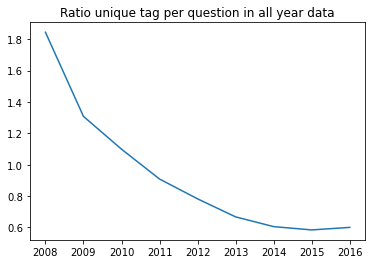

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.lineplot(x = all_years, y = ratios)
ax.set_title('Ratio unique tag per question in all year data')